## Parser for getting input features from .FIT files:

In [78]:

##Open file: 
print("Reading file...")
filename = "2018-11-09-11-16-27.csv"
file = open(filename, "r")

acc_x = []
acc_y = []
acc_z = []

gyro_x = []
gyro_y = []
gyro_z = []

mag_x = []
mag_y = []
mag_z = []

distance_14_array = []
speed_14_array = []
altitude_14_array = []
das_14_time = []
distance_time = []

distance_0_array = []
speed_0_array = []
altitude_0_array = []
velocity_0_array = []
das_0_time = []

last_sec = 0
last_ms = 0

velocity_x_array = []
velocity_y_array = []
velocity_z_array = []

#Data,10,gyroscope_data,timestamp,"4",s
#Data,11,accelerometer_data,timestamp, "4", s
#Data,12,magnetometer_data,timestamp,"4",s

##Read in lines, append values to arrays:
count = 0
for full_line in file:
    line = full_line.split(',')

    #print(line)

    #Add gyroscope data: 
    if "gyroscope_data" in line: 
        timestamp = line[4]
        gyro_x_vals = line[10].strip('\"')
        for val in gyro_x_vals.split('|'):
            gyro_x.append(val)
        gyro_y_vals = line[13].strip('\"')
        for val in gyro_y_vals.split('|'):
            gyro_y.append(val)
        gyro_z_vals = line[16].strip('\"')
        for val in gyro_z_vals.split('|'):
            gyro_z.append(val)



    #Add accelerometer data: 
    elif ("accelerometer_data" in line): 
        #print("Acc")
        timestamp = line[4]
        acc_x_vals = line[10].strip('\"')
        for val in acc_x_vals.split('|'):
            #print(val)
            acc_x.append(val)
        acc_y_vals = line[13].strip('\"')
        for val in acc_y_vals.split('|'):
            acc_y.append(val)
        acc_z_vals = line[16].strip('\"')
        for val in acc_z_vals.split('|'):
            acc_z.append(val) 

    #Add magnetometer data: 
    elif "magnetometer_data" in line: 
        timestamp = line[4]
        mag_x_vals = line[10].strip('\"')
        for val in mag_x_vals.split('|'):
            mag_x.append(val)
        mag_y_vals = line[13].strip('\"')
        for val in mag_y_vals.split('|'):
            mag_y.append(val)
        mag_z_vals = line[16].strip('\"')
        for val in mag_z_vals.split('|'):
            mag_z.append(val)

    #elif "Data" and "7" and "record" and "distance" and "m" in line: 
        #timestamp = line[3]              ##timestamp in seconds
        #distance = line[6]
        #distance_array.append(distance)  ##distance in meters



    #elif ("Data" and "14" and "record" and "m/s") in line:
    #elif ("Data" and "14" and "enhanced_speed") in line:
    elif ("enhanced_speed") in line:
        #print("Line_14: \n", line)
        

        timestamp = line[4].strip('\"')
        timestamp = int(timestamp)
        
        if timestamp != 1: 
        
            position_lat = line[7]
            position_long = line[10]
            distance = line[13]
            enhanced_speed = line[16].strip('\"')        ##enhanced_speed in m/s
            enhanced_alt = line[19]                      ##enhanced_altitude in m 


            if timestamp == last_sec: 
                last_ms += .1
                timestamp = timestamp + last_ms
            else: 
                last_sec = timestamp
                last_ms = 0

            das_14_time.append(timestamp)

            speed_14_array.append(enhanced_speed)
            altitude_14_array.append(enhanced_alt)
            
            if ("Data" and "14" and "distance") in line:
                distance_14_array.append(distance)
                distance_time.append(timestamp)
                #print(distance, timestamp)
                
            
            #if "velocity" in line: 
            
            
            
            #if "enhanced_altitude" in line: 




    #Scrap this statement: 
    '''
    elif ("gps_metadata" and "velocity" and "m/s") in line: 
        #print("Line_0: \n", line)
        timestamp = line[4]
        position_lat = line[7]
        position_long = line[10]
        distance = line[13]
        enhanced_speed = line[16]        ##enhanced_speed in m/s
        enhanced_alt = line[19]          ##enhanced_altitude in m 

        velocity = line[28]
        velocity = velocity.strip('\"').split("|")
        if (len(velocity)==3):
            velocity_x = velocity[0]
            velocity_y = velocity[1]
            velocity_z = velocity[2]
            #print(velocity)
            velocity_x_array.append(velocity_x)
            velocity_y_array.append(velocity_y)
            velocity_z_array.append(velocity_z)

        das_0_time.append(timestamp)
        speed_0_array.append(enhanced_speed)
        altitude_0_array.append(enhanced_alt)
        distance_0_array.append(distance)
    '''



#Note: need to drop the first value (garbage) from every acc_x, y, z array. 

#file.close()


#print(das_14_time)  #2 x 6s then 10 x all other numbers until maybe end? 
print("Speed_14_array: ", len(speed_14_array))
print("Time_14_array: ", len(das_14_time))
print(len(acc_x))
print(len(velocity_x_array))



#print("Speed data: ", speed_14_array)
#print("Time data: ", das_14_time)
zipped = zip(speed_14_array, das_14_time)
print("\n")
print("Zipped Time/Speed data: \n")
#for x,y in zipped:
    #print(x,y)

    
print("Printing distance/time data: \n")
zip_dist = zip(distance_14_array, distance_time)
for d, t in zip_dist:
    print(d,t)




#fit_parse("2018-11-09-11-16-27.csv")
#fit_parse_prints()









Reading file...
Speed_14_array:  31499
Time_14_array:  31499
363421
0


Zipped Time/Speed data: 

Printing distance/time data: 

"0.0" 6
"0.0" 7.4
"0.0" 8.4
"0.65" 9.3
"1.15" 10.3
"1.42" 11.3
"1.49" 12.3
"1.76" 13.3
"2.28" 14.3
"2.52" 15.3
"2.52" 16.3
"2.52" 17.3
"2.72" 18.3
"2.72" 19.3
"2.72" 20.3
"3.09" 21.3
"3.44" 22.3
"3.96" 23.3
"3.98" 24.3
"3.98" 25.3
"3.98" 26.3
"3.98" 27.3
"3.98" 28.3
"4.06" 29.3
"4.48" 30.3
"4.77" 31.3
"4.87" 32.4
"4.99" 33.3
"4.99" 34.3
"4.99" 35.4
"5.16" 36.3
"5.2" 37.3
"5.27" 38.3
"5.36" 39.3
"5.44" 40.3
"5.52" 41.3
"5.62" 42.3
"5.79" 43.3
"5.99" 44.3
"6.15" 45.4
"6.26" 46.4
"6.26" 72.3
"7.04" 73.3
"7.04" 74.3
"8.19" 75.3
"10.87" 76.3
"12.03" 77.3
"13.45" 78.3
"14.47" 79.3
"16.04" 80.3
"17.44" 81.3
"19.09" 82.3
"20.61" 83.3
"21.8" 84.3
"23.03" 85.3
"24.29" 86.3
"25.94" 87.3
"27.38" 88.3
"28.92" 89.3
"30.35" 90.3
"30.48" 91.3
"30.76" 92.3
"31.43" 93.2
"32.55" 94.3
"33.96" 95.3
"35.21" 96.3
"35.21" 97.3
"35.21" 98.3
"35.35" 99.3
"35.73" 100.4
"35.82" 101.3
"3

"473.43" 762.3
"474.0" 763.3
"474.72" 764.3
"475.15" 765.3
"475.33" 766.2
"475.95" 767.2
"476.43" 768.2
"476.7" 769.3
"476.95" 770.3
"477.19" 771.3
"477.77" 772.2
"479.34" 773.3
"482.29" 774.3
"487.29" 775.3
"491.35" 776.2
"493.5" 777.2
"494.69" 778.2
"495.45" 779.2
"495.99" 780.2
"496.63" 781.2
"497.19" 782.2
"497.29" 783.2
"499.47" 784.3
"502.48" 785.2
"503.29" 786.2
"504.56" 787.3
"505.16" 788.2
"506.1" 789.2
"506.7" 790.2
"507.6" 791.2
"507.99" 792.2
"508.63" 793.2
"509.34" 794.3
"510.1" 795.3
"510.64" 796.3
"511.24" 797.3
"511.96" 798.3
"512.83" 799.2
"513.73" 800.2
"514.64" 801.3
"515.36" 802.3
"515.76" 803.3
"516.17" 804.2
"517.12" 805.3
"518.11" 806.3
"519.22" 807.3
"520.33" 808.2
"520.61" 809.2
"520.61" 810.2
"521.32" 811.3
"521.74" 812.3
"521.8" 813.3
"522.21" 814.2
"523.08" 815.2
"524.19" 816.2
"525.21" 817.2
"525.66" 818.2
"526.04" 819.3
"526.04" 820.3
"526.79" 821.3
"527.06" 822.3
"527.27" 823.3
"527.32" 824.3
"527.32" 825.3
"527.49" 826.3
"527.88" 827.2
"528.27" 828.2
"52

"817.47" 1512.3
"819.55" 1513.3
"820.08" 1514.3
"820.08" 1515.3
"820.17" 1516.3
"820.43" 1517.2
"820.56" 1518.3
"820.92" 1519.3
"821.43" 1520.2
"822.29" 1521.3
"823.8" 1522.3
"826.6" 1523.2
"830.17" 1524.3
"833.31" 1525.3
"835.54" 1526.3
"836.32" 1527.3
"836.8" 1528.3
"836.8" 1529.2
"838.51" 1530.3
"839.57" 1531.3
"839.99" 1532.2
"840.23" 1533.3
"841.26" 1534.3
"841.47" 1535.3
"841.64" 1536.2
"841.65" 1537.3
"842.57" 1538.3
"843.03" 1539.2
"843.9" 1540.3
"845.18" 1541.3
"845.18" 1542.3
"845.68" 1543.2
"846.21" 1544.3
"846.83" 1545.2
"848.15" 1546.3
"848.49" 1547.2
"849.03" 1548.3
"849.68" 1549.3
"850.39" 1550.3
"851.28" 1551.3
"851.44" 1552.3
"852.23" 1553.3
"853.15" 1554.3
"854.16" 1555.3
"855.05" 1556.3
"855.75" 1557.2
"856.78" 1558.3
"858.03" 1559.3
"858.9" 1560.3
"859.73" 1561.3
"861.01" 1562.2
"862.46" 1563.3
"863.51" 1564.3
"864.18" 1565.3
"865.27" 1566.2
"866.14" 1567.3
"867.37" 1568.3
"868.18" 1569.2
"868.46" 1570.3
"868.93" 1571.3
"869.45" 1572.3
"869.88" 1573.3
"869.88" 1574.

"1512.44" 2762.3
"1513.1" 2763.3
"1514.0" 2764.3
"1514.0" 2765.3
"1514.71" 2766.3
"1515.51" 2767.3
"1516.39" 2768.3
"1517.34" 2769.3
"1518.62" 2770.3
"1519.86" 2771.3
"1520.61" 2772.3
"1521.64" 2773.3
"1522.95" 2774.2
"1524.17" 2775.3
"1525.4" 2776.3
"1526.67" 2777.3
"1527.39" 2778.3
"1528.01" 2779.2
"1528.58" 2780.3
"1529.56" 2781.3
"1529.98" 2782.3
"1530.22" 2783.3
"1530.28" 2784.2
"1530.85" 2785.3
"1531.57" 2786.3
"1531.57" 2787.3
"1532.08" 2788.3
"1532.1" 2789.3
"1532.1" 2790.3
"1532.41" 2791.3
"1532.41" 2792.2
"1532.65" 2793.3
"1532.86" 2794.3
"1532.94" 2795.3
"1532.94" 2796.2
"1532.94" 2797.3
"1532.97" 2798.3
"1533.07" 2799.3
"1533.29" 2800.3
"1533.62" 2801.3
"1533.83" 2802.2
"1533.93" 2803.3
"1534.04" 2804.3
"1534.47" 2805.3
"1535.19" 2806.3
"1535.94" 2807.3
"1536.22" 2808.3
"1536.58" 2809.3
"1537.21" 2810.3
"1538.16" 2811.3
"1539.58" 2812.3
"1541.81" 2813.3
"1544.71" 2814.3
"1546.51" 2815.3
"1546.8" 2816.3
"1547.11" 2817.3
"1547.21" 2818.3
"1547.23" 2819.2
"1547.32" 2820.3
"154

In [64]:
#For each speed with the same timestamp, average the speeds and set that to be the real speed, set time to first digit
#Fill in these arrays:

def fit_create_arrays(speed_14_array, das_14_time): 
    avg_speed_array = []
    avg_time_array = []

    #Initialize: 
    speed_index = 0
    time_index = 0
    div = 1.0
    curr_speed = float(speed_14_array[speed_index].strip(""))
    next_speed = float(speed_14_array[speed_index+1])
    curr_first_digit = int(das_14_time[time_index])
    next_first_digit = int(das_14_time[time_index+1])
    avg_speed = curr_speed

    while time_index < (len(das_14_time)): 

        while(next_first_digit == curr_first_digit):
            div += 1.0
            avg_speed += next_speed
            #print(next_first_digit, curr_first_digit)

            #resetting indices:
            time_index += 1 #curr_first_digit = next_first_digit
            #print(time_index)
            if (time_index == len(das_14_time)-2):
                break;
            curr_first_digit = int(das_14_time[time_index])
            next_first_digit = int(das_14_time[time_index+1])
            speed_index += 1
            curr_speed = float(speed_14_array[speed_index])
            next_speed = float(speed_14_array[speed_index+1])

        #outside of equals while loop:
        avg_speed = float(avg_speed/div)
        div = 1.0
        avg_speed_array.append(avg_speed)
        avg_time_array.append(curr_first_digit)

        #resetting indices:
        if (time_index == len(das_14_time)-2):
                break;
        time_index += 1 #curr_first_digit = next_first_digit
        curr_first_digit = int(das_14_time[time_index])
        next_first_digit = int(das_14_time[time_index+1])
        speed_index += 1
        curr_speed = float(speed_14_array[speed_index])
        next_speed = float(speed_14_array[speed_index+1])

        avg_speed = curr_speed
        
    avg_time_array.pop(-1)
    avg_speed_array.pop(-1)  
    return avg_speed_array, avg_time_array

def fit_print_zipped_arrays():
    zipped = zip(avg_speed_array, avg_time_array)
    for s,t in zipped:
        print(s,t)
        
        
fit_create_arrays(speed_14_array, das_14_time)
fit_print_zipped_arrays()

2.8369999999999997 6
0.7903 7
0.5416 8
0.25670000000000004 9
0.054000000000000006 10
0.2112 11
0.0 12
0.2748 13
0.36110000000000003 14
0.09988888888888887 15
0.043 16
0.0236 17
0.0 18
0.0 19
0.0 20
0.25399999999999995 21
0.36719999999999997 22
0.37170000000000003 23
0.0412 24
0.1147 25
0.20639999999999997 26
0.09109999999999999 27
0.0 28
0.17509999999999998 29
0.3978 30
0.0 31
0.0 32
0.0 33
0.0 34
0.0 35
0.0 36
0.0 37
0.0 38
0.0 39
0.0 40
0.0 41
0.0 42
0.0 43
0.0 44
0.0 45
0.0 46
0.0 47
0.0 48
0.0 49
0.0 50
0.0 51
0.0 52
0.0 53
0.0 54
0.0 55
0.0 56
0.0 57
0.0 58
0.0 59
0.0 60
0.0 61
0.0 62
0.0 63
0.0 64
0.0 65
0.0 66
0.0 67
0.0 68
0.0 69
0.0 70
0.0 71
0.0 72
0.4261818181818182 73
0.5206363636363636 74
1.0575454545454546 75
1.5637999999999999 76
1.3397000000000001 77
0.9452999999999999 78
1.1320999999999999 79
1.4317777777777778 80
1.3617000000000001 81
1.5091 82
1.3152 83
0.9732000000000001 84
1.2036666666666667 85
1.2948 86
1.3403999999999998 87
1.5294999999999999 88
1.362888888888889

0.2328888888888889 1195
0.05477777777777778 1196
0.015111111111111112 1197
0.2386666666666667 1198
0.2888888888888889 1199
0.325375 1200
0.156 1201
0.1322222222222222 1202
0.18625 1203
0.5233333333333333 1204
0.3207777777777777 1205
0.128 1206
0.09455555555555556 1207
0.16455555555555557 1208
0.14866666666666664 1209
0.19025 1210
0.030222222222222223 1211
0.07766666666666666 1212
0.08900000000000001 1213
0.085 1214
0.22375 1215
0.16477777777777777 1216
0.035111111111111114 1217
0.12944444444444445 1218
0.09355555555555556 1219
0.0 1220
0.0 1221
0.04955555555555555 1222
0.035666666666666666 1223
0.38249999999999995 1224
0.026555555555555554 1225
0.03622222222222222 1226
0.13522222222222224 1227
0.8938888888888888 1228
0.48877777777777787 1229
0.03322222222222222 1230
0.116625 1231
0.025333333333333333 1232
0.21244444444444444 1233
0.4858888888888889 1234
0.291875 1235
0.4343333333333333 1236
0.5292222222222223 1237
0.3375555555555556 1238
0.2061111111111111 1239
0.0 1240
0.0 1241
0.2671

0.041999999999999996 2445
0.111125 2446
0.1095 2447
0.4176666666666667 2448
0.1922857142857143 2449
0.19124999999999998 2450
0.128375 2451
0.0 2452
0.10622222222222222 2453
0.124625 2454
0.12475 2455
0.22275000000000003 2456
0.135 2457
0.0825 2458
0.07350000000000001 2459
0.049 2460
0.04425 2461
0.218625 2462
0.060375 2463
0.253625 2464
0.1955 2465
0.083625 2466
0.05475 2467
0.08700000000000001 2468
0.138 2469
0.28877777777777774 2470
0.163375 2471
0.47424999999999995 2472
0.4111111111111111 2473
0.268625 2474
0.2395 2475
0.22211111111111106 2476
0.303625 2477
0.3961111111111111 2478
0.192625 2479
0.1302222222222222 2480
0.17525 2481
0.01475 2482
0.25066666666666665 2483
0.32975 2484
0.370875 2485
0.6361111111111112 2486
0.31437499999999996 2487
1.4865000000000002 2488
0.7722500000000001 2489
0.43750000000000006 2490
0.8158888888888889 2491
1.055875 2492
1.7715 2493
2.297625 2494
1.6456666666666666 2495
0.5241428571428571 2496
0.12311111111111112 2497
0.202625 2498
0.36950000000000005 

Plotting...


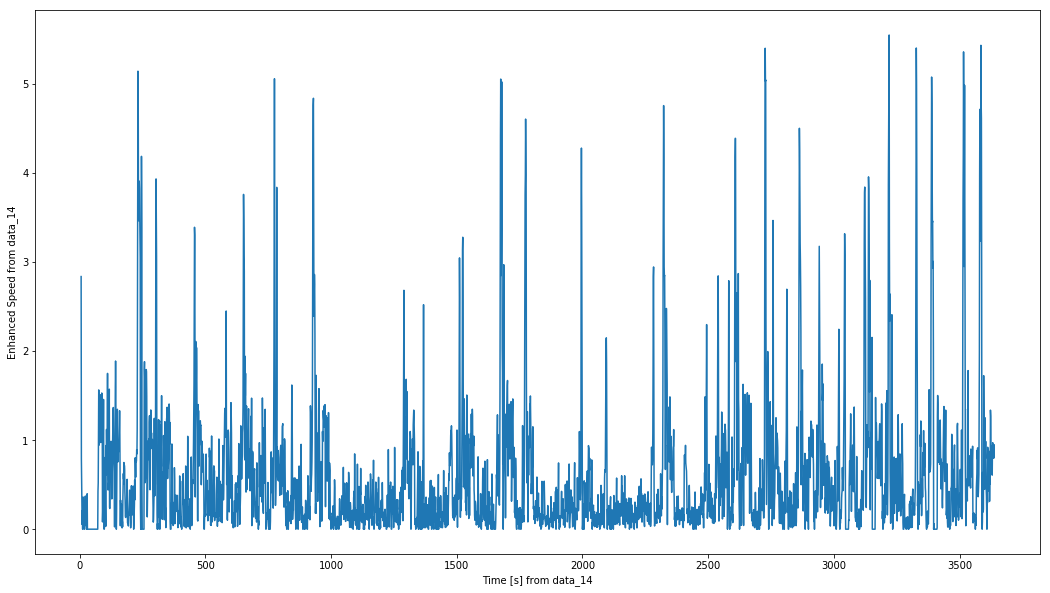

In [45]:
##Graph results: 
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

print("Plotting...")
#x = das_14_time
#y = speed_14_array

#avg_time_array.pop(-1)
#avg_speed_array.pop(-1)

x = avg_time_array
y = avg_speed_array

#x_ticks = np.arange([])
#y_ticks = np.arange([])

plt.figure(figsize=(18,10))

plt.plot(x,y)
plt.xlabel('Time [s] from data_14')
plt.ylabel('Enhanced Speed from data_14')
#frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels(x_ticks)
#frame1.axes.yaxis.set_ticklabels(y_ticks)

plt.show()

Plotting...


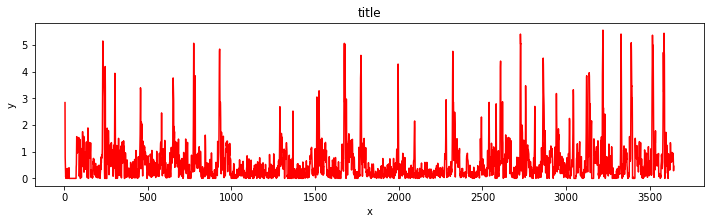

In [40]:
import matplotlib.pyplot as plt
print("Plotting...")
fig, axes = plt.subplots(figsize=(12,3))
x = avg_time_array
y = avg_speed_array
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [ ]:
#Label sections of velocity data as surfing/paddling/floating to visually see if looks theoretically correct? 
